## 하이퍼파라미터 튜닝
-  모델의 성능을 확보하기 위해 조절하는 설정값

**Hyperparameter tuning** $\rightarrow$ Build Models $\rightarrow$ Models $\rightarrow$ Training Result $\rightarrow$ **Hyperparameter tuning** $\cdots$

- 튜닝대상
    - 결정나무에서 해볼만한 것: max_depth (수학적 최적화가 불가능)
    - 간단히 반복문으로 max_depth를 바꿔가며 테스트
    - 그러나 더 간단한 방법이 있다.

### wine data로 실습

In [1]:
red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine])
wine['taste'] = [1. if grade > 5 else 0. for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis=1)
y = wine.taste

#### GridSearchCV
- CV(Cross Validation)
- 결과를 확인하고 싶은 파라미터를 `param_gird` 속성에 정의해줌
- `n_jobs` 옵션을 높이면 CPU의 코어를 보다 병렬로 활용함. 코어가 많다면 n_job를 높이면 속도가 빨라진다

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {'max_depth': [2, 4, 7, 10]}
wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)

gridsearch = GridSearchCV(estimator=wine_tree, param_grid=params, cv=5)
gridsearch.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=2,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=13,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': [2, 4, 7, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=Non

GridSearchCV의 결과 확인

In [3]:
import pprint

pp = pprint.PrettyPrinter(indent=4)
pp.pprint(gridsearch.cv_results_)

{   'mean_fit_time': array([0.0057776 , 0.01001801, 0.01635695, 0.02265601]),
    'mean_score_time': array([0.00080662, 0.00094981, 0.000804  , 0.00080271]),
    'mean_test_score': array([0.68877944, 0.66353702, 0.65337848, 0.64383562]),
    'param_max_depth': masked_array(data=[2, 4, 7, 10],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object),
    'params': [   {'max_depth': 2},
                  {'max_depth': 4},
                  {'max_depth': 7},
                  {'max_depth': 10}],
    'rank_test_score': array([1, 2, 3, 4]),
    'split0_test_score': array([0.55230769, 0.51230769, 0.50846154, 0.51615385]),
    'split1_test_score': array([0.68846154, 0.63153846, 0.60307692, 0.60076923]),
    'split2_test_score': array([0.71461538, 0.72384615, 0.68384615, 0.66769231]),
    'split3_test_score': array([0.73210162, 0.73210162, 0.73672055, 0.70977675]),
    'split4_test_score': array([0.75654854, 0.71802773, 0.73497689, 0.72496148]),
    'std

최적의 성능을 가진 모델
- max_depth=2

In [4]:
gridsearch.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=13, splitter='best')

In [5]:
gridsearch.best_score_

0.6887794366630753

In [6]:
gridsearch.best_params_

{'max_depth': 2}

#### Pipeline에 GridSearchCV 적용하기

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

estimators = [('scaler', StandardScaler()), 
             ('clf', DecisionTreeClassifier(random_state=13))]

pipe = Pipeline(estimators)

In [8]:
param_grid = [{'clf__max_depth': [2, 4, 7, 10]}]

GridSearch = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5)
GridSearch.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        DecisionTreeClassifier(class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
           

In [9]:
GridSearch.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=2, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=13,
                                        splitter='best'))],
         verbose=False)

In [10]:
GridSearch.best_score_

0.6887794366630753

In [11]:
GridSearch.best_params_

{'clf__max_depth': 2}

In [12]:
GridSearch.cv_results_

{'mean_fit_time': array([0.00898752, 0.01157026, 0.01774831, 0.02393708]),
 'std_fit_time': array([0.00208404, 0.00048502, 0.000414  , 0.0006458 ]),
 'mean_score_time': array([0.00118251, 0.00099807, 0.00099473, 0.00100551]),
 'std_score_time': array([4.06927294e-04, 7.76732457e-06, 3.99633920e-06, 1.82614313e-05]),
 'param_clf__max_depth': masked_array(data=[2, 4, 7, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'clf__max_depth': 2},
  {'clf__max_depth': 4},
  {'clf__max_depth': 7},
  {'clf__max_depth': 10}],
 'split0_test_score': array([0.55230769, 0.51230769, 0.50846154, 0.51615385]),
 'split1_test_score': array([0.68846154, 0.63153846, 0.60461538, 0.60230769]),
 'split2_test_score': array([0.71461538, 0.72384615, 0.68384615, 0.66846154]),
 'split3_test_score': array([0.73210162, 0.73210162, 0.73672055, 0.70669746]),
 'split4_test_score': array([0.75654854, 0.71802773, 0.73497689, 0.72650231]),
 'mean_test_scor

#### Tree 확인

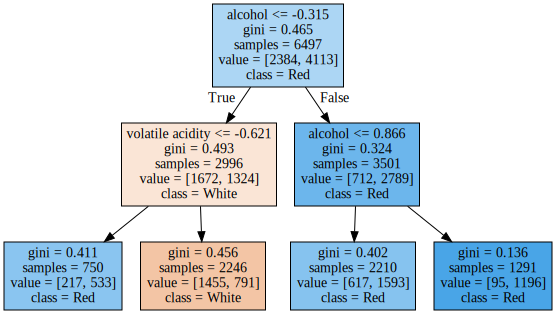

In [13]:
from graphviz import Source
from sklearn.tree import export_graphviz

Source(export_graphviz(GridSearch.best_estimator_['clf'], feature_names=X.columns, class_names=['White', 'Red'], rounded=False, filled=True))

#### 표로 성능 결과를 정리하기

In [14]:
score_df = pd.DataFrame(GridSearch.cv_results_)
score_df[['params', 'rank_test_score', 'mean_test_score', 'std_test_score']]

,params,rank_test_score,mean_test_score,std_test_score
0,{'clf__max_depth': 2},1,0.688779,0.071784
1,{'clf__max_depth': 4},2,0.663537,0.083916
2,{'clf__max_depth': 7},3,0.653686,0.087078
3,{'clf__max_depth': 10},4,0.643990,0.076706
